In [21]:
import seaborn as sns
# set font-scale
sns.set(style="whitegrid", context="notebook",font_scale=1.2)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [22]:
def load_csvs_into_df(dir):
    dirs = [os.path.join(dir,d) for d in os.listdir(dir) if os.path.isdir(os.path.join(dir,d))]
    dfs = []
    for d in dirs:
        seeds = [f for f in os.listdir(os.path.join('./',d)) if f.startswith('seed')]
        for seed in seeds:
            results = [f for f in os.listdir(os.path.join(d,seed)) if f.startswith('test_results')][0]
            results_df = pd.read_csv(os.path.join(d, seed, results))
            dfs.append(results_df)
    df = pd.concat(dfs)
    return df

In [23]:
df = load_csvs_into_df('./')

In [24]:
# only keep relevant columns
df = df[['seed','effective_dataset_size','test/lungOpacity_female_subgroupAUROC','test/lungOpacity_male_subgroupAUROC','protected_attr_percent']]

In [25]:
df = pd.melt(df, id_vars=['seed','protected_attr_percent','effective_dataset_size'], value_vars=['test/lungOpacity_female_subgroupAUROC','test/lungOpacity_male_subgroupAUROC'])

In [26]:
# replace variable names
print(df.variable.unique())
df.variable = df.variable.str.replace('test/lungOpacity_female_subgroupAUROC','female')
df.variable = df.variable.str.replace('test/lungOpacity_male_subgroupAUROC','male')
df.head()

['test/lungOpacity_female_subgroupAUROC'
 'test/lungOpacity_male_subgroupAUROC']


,seed,protected_attr_percent,effective_dataset_size,variable,value
0,2,0.25,0.002,female,0.5074
1,1,0.25,0.002,female,0.4996
2,5,0.25,0.002,female,0.4888
3,3,0.25,0.002,female,0.5246
4,4,0.25,0.002,female,0.4922


In [27]:
# load effective_dataset_size 1 
df_1 = load_csvs_into_df('../2023-09-06 22:38:03-FAE-rsna-sex-bs32-noDP')
df_1 = df_1[['seed','test/lungOpacity_female_subgroupAUROC','test/lungOpacity_male_subgroupAUROC','protected_attr_percent']]
df_1['effective_dataset_size'] = 1
df_1 = pd.melt(df_1, id_vars=['seed','protected_attr_percent','effective_dataset_size'], value_vars=['test/lungOpacity_female_subgroupAUROC','test/lungOpacity_male_subgroupAUROC'])
df_1 = df_1[df_1.protected_attr_percent.isin([0,0.25,0.5,0.75,1])]
print(df.variable.unique())
df_1.variable = df_1.variable.str.replace('test/lungOpacity_female_subgroupAUROC','female')
df_1.variable = df_1.variable.str.replace('test/lungOpacity_male_subgroupAUROC','male')
df_1.head()

['female' 'male']


,seed,protected_attr_percent,effective_dataset_size,variable,value
5,2,0.25,1,female,0.8254
6,1,0.25,1,female,0.8240
7,5,0.25,1,female,0.8118
8,3,0.25,1,female,0.8248
9,4,0.25,1,female,0.8246


In [28]:
# concat df and df_1
df = pd.concat([df,df_1])

In [29]:
# sort list ascending
fractions = df.protected_attr_percent.unique()
fractions.sort()

In [30]:
# sort df by effective_dataset_size
df = df.sort_values(by=['effective_dataset_size'])

In [31]:
sizes = df.effective_dataset_size.unique()

best_dss 4 1.0


/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

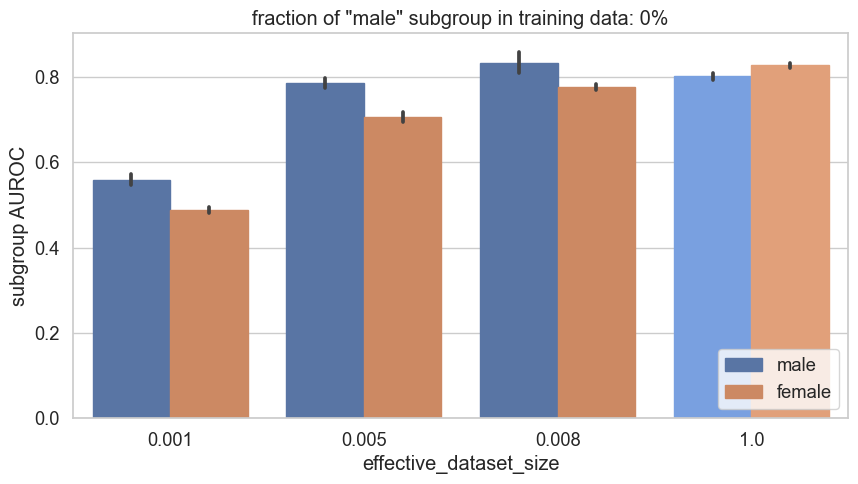

best_dss 4 1.0


/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

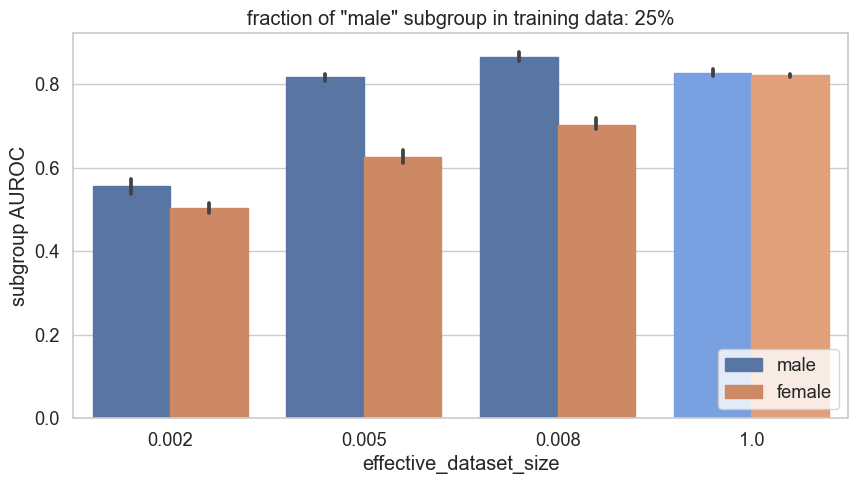

best_dss 4 1.0


/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

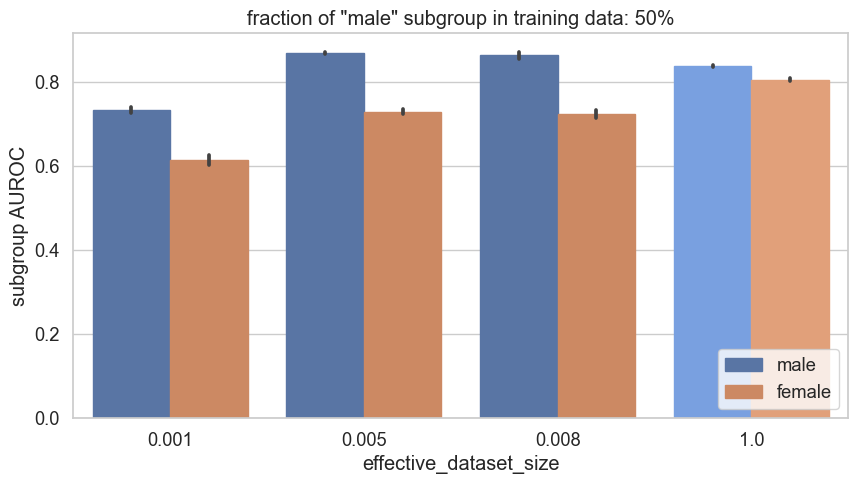

best_dss 4 1.0


/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

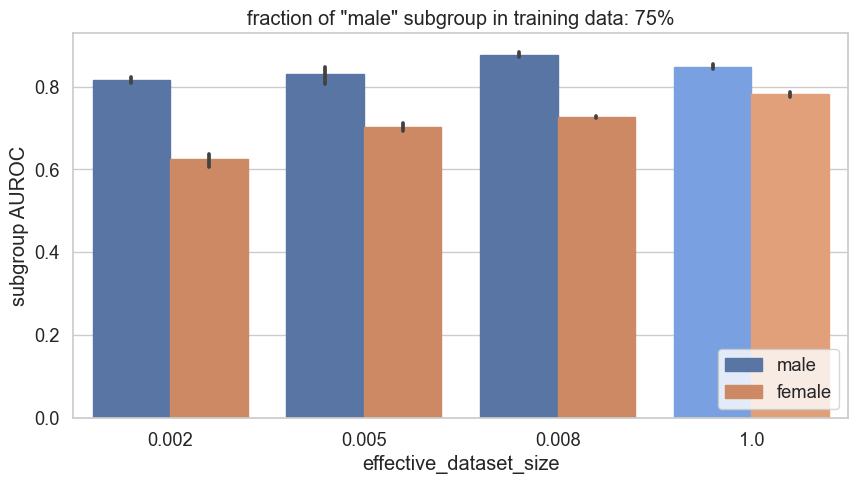

best_dss 4 1.0


/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

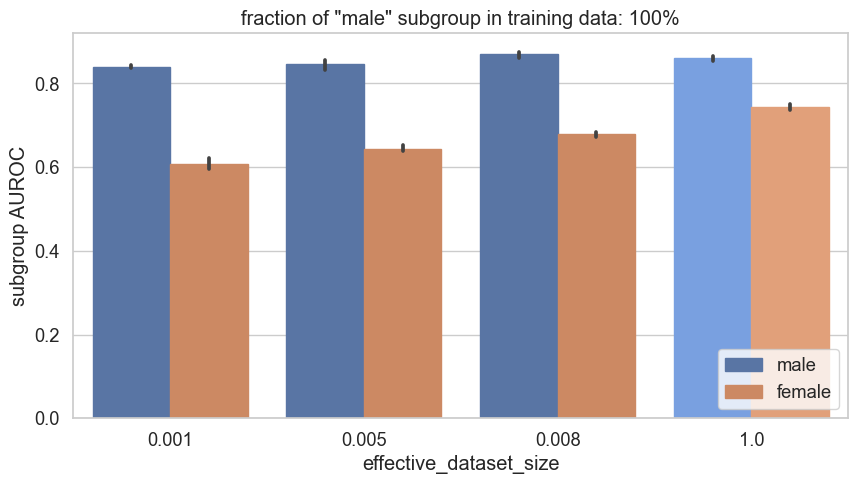

In [33]:
for f in fractions:
    plt.figure(figsize=(10,5))
    sub = df[df.protected_attr_percent==f]
    # over all weights get weight with minimum dist between female and male subgroup AUROC
    min_dist = np.inf
    best_dss = None
    best_dss_max = None
    best_dss_min = None
    for idx, w in enumerate(sizes):
        sub_grouped_w = sub[sub.effective_dataset_size==w]
        # compute dist between max and min of value column
        dist = sub_grouped_w.value.max() - sub_grouped_w.value.min()
        if dist < min_dist:
            min_dist = dist
            best_dss = idx
            best_dss_max = sub_grouped_w.value.max()
            best_dss_min = sub_grouped_w.value.min()
    print("best_dss", best_dss, sizes[best_dss])
    # sort sub by variable
    sub = sub.sort_values(by=['variable'], ascending=False)
    g = sns.barplot(data=sub, x="effective_dataset_size", y="value", hue="variable")
    custom_colors = ["#5975A4"]*3 + ["#79a0e0"] + ["#CC8963"]*3 + ["#e1a07a"]
    for i, bar in enumerate(g.patches):
        bar.set_color(custom_colors[i])
    plt.title(f'fraction of "male" subgroup in training data: {f*100:.0f}%')
    # set axis labels
    plt.xlabel('effective_dataset_size')
    plt.ylabel('subgroup AUROC')
    plt.legend(loc="lower right")
    plt.show()